In [17]:
'''

截取所有条件的epoch，然后进行清洗。

截取的长度不一样，RSA和ASSR要分开处理

所有epoch ，然后再来考虑 evoked


RSA 实验

刺激	恒定duration	mark
ba1.wav	1	101
ba2.wav	1	102
ba3.wav	1	103
ba4.wav	1	104
da1.wav	1	111
da2.wav	1	112
da3.wav	1	113
da4.wav	1	114
pa1.wav	1	121
pa2.wav	1	122
pa3.wav	1	123
pa4.wav	1	124
ta1.wav	1	131
ta2.wav	1	132
ta3.wav	1	133
ta4.wav	1	134



ASSR 实验

4_18s.wav	4	4	21.7
6_18s.wav	6	6	21.7

'''


'\n\n截取所有条件的epoch，然后进行清洗。\n\n截取的长度不一样，RSA和ASSR要分开处理\n\n所有epoch ，然后再来考虑 evoked\n\n\nRSA 实验\n\n刺激\t恒定duration\tmark\nba1.wav\t1\t101\nba2.wav\t1\t102\nba3.wav\t1\t103\nba4.wav\t1\t104\nda1.wav\t1\t111\nda2.wav\t1\t112\nda3.wav\t1\t113\nda4.wav\t1\t114\npa1.wav\t1\t121\npa2.wav\t1\t122\npa3.wav\t1\t123\npa4.wav\t1\t124\nta1.wav\t1\t131\nta2.wav\t1\t132\nta3.wav\t1\t133\nta4.wav\t1\t134\n\n\n\nASSR 实验\n\n4_18s.wav\t4\t4\t21.7\n6_18s.wav\t6\t6\t21.7\n\n'

In [18]:
import mne
import os.path as op
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from autoreject import AutoReject

In [19]:


sub_ids = [
            'pre4012_y'
          ]



#for sub_id,i in zip(sub_ids,range(len(sub_ids))):
    #读入之前处理好的reconst_raw

sub_id = sub_ids[0]
i = 0
save_path_ica = '.\data\\4raw_ica\\'
reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + 'RSA.fif')

Opening raw data file .\data\4raw_ica\pre4012_yRSA.fif...


C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_28764\2958160593.py:13: RuntimeWarning: This filename (.\data\4raw_ica\pre4012_yRSA.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + 'RSA.fif')


    Range : 1055444 ... 2802732 =   1055.444 ...  2802.732 secs
Ready.


In [20]:
events_1 = mne.events_from_annotations(reconst_raw)

Used Annotations descriptions: ['101', '102', '103', '104', '111', '112', '113', '114', '121', '122', '123', '124', '131', '132', '133', '134']


In [21]:

target_events_RSA = {
                            '101':101,
                            '102':102,
                            '103':103,
                            '104':104,
                            '111':111,
                            '112':112,
                            '113':113,
                            '114':114,
                            '121':121,
                            '122':122,
                            '123':123,
                            '124':124,
                            '131':131,
                            '132':132,
                            '133':133,
                            '134':134,

                     }

#先找events，epoch和average都是一步的事情。
custom_mapping = target_events_RSA
#
(events_from_annot,
 event_dict) = mne.events_from_annotations(reconst_raw, event_id=custom_mapping)
#还不如直接对 events_from_annot 进行切片
#先遍历，把合适的单词筛序出来
#对应的vocabulary已经列出，然后怎么提取呢？
events_RSA = events_from_annot
count_remembered_events = len(events_RSA)
# 导入MATLAB发现event数量多于epoch数量,你怀疑是重合?
epochs_RSA = mne.Epochs(reconst_raw, events_RSA, event_id=event_dict, baseline =(-0.2,0),tmin=-0.2, tmax=0.8, preload=True, event_repeated='drop')
from mne.export import export_epochs
file_path_save = 'L:\yanglab1_EEG\RSA\data\\6epoch_clean_RSA\\'
export_epochs(file_path_save + sub_ids[0]+".set", epochs=epochs_RSA, fmt = 'eeglab', overwrite = True)
#查看所有mark dict
#events_1 = mne.events_from_annotations(reconst_raw)

Used Annotations descriptions: ['101', '102', '103', '104', '111', '112', '113', '114', '121', '122', '123', '124', '131', '132', '133', '134']
Not setting metadata
1437 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1437 events and 1001 original time points ...
296 bad epochs dropped
Overwriting existing file.


I:\ProgramData\Anaconda3\envs\mne\Lib\site-packages\eeglabio\epochs.py:109 EEGLABIO: WARNING: Invalid event latencies, ignored for export.
I:\ProgramData\Anaconda3\envs\mne\Lib\site-packages\eeglabio\epochs.py:118 EEGLABIO: WARNING: Some or all annotations have invalid onsets, discarded for export.


In [22]:
'''

'''
save_path_epoch = '.\data\\5epoch_RSA\\'
epochs_RSA.save(save_path_epoch + sub_id + '-epo.fif', overwrite=True)


Overwriting existing file.


In [23]:
    #用autoreject处理一下
n_interpolates = np.array([1, 4, 32])
consensus_percs = np.linspace(0, 0.8, 11)
picks = mne.pick_types(epochs_RSA.info, meg=False, eeg=True, stim=False, eog=False,
                       include=[], exclude=[])
ar_RSA = AutoReject(n_interpolates,consensus_percs,picks=picks,
                thresh_method='random_search',random_state=23)
ar_RSA.fit(epochs_RSA)
epochs_clean_RSA = ar_RSA.transform(epochs_RSA)


Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/62 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/62 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1141 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1141 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1141 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/1141 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.56 and n_interpolate=32


  0%|          | Repairing epochs : 0/1141 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


In [24]:
'''
不拆了，全放到一起
'''
evoked_original_RSA = list()
evoked_clean_RSA = list()

In [25]:
#先average看下结果，对比
#如果结果不错就可以分别保存下来。
evoked_original_RSA.append(epochs_RSA.average())#没有autoreject的
evoked_clean_RSA.append(epochs_clean_RSA.average())
"""
查看效果，看是否需要回去删除电极
"""
%matplotlib qt

fig_original = evoked_original_RSA[i].plot(window_title = sub_id)
fig_clean = evoked_clean_RSA[i].plot(window_title = sub_id)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [26]:
#保存

save_path_epoch_clean = '.\data\\6epoch_clean_RSA\\'
epochs_clean_RSA.save(save_path_epoch_clean + sub_id + '_RSA-epo.fif', overwrite=True)
save_path_evoked = '.\data\\7evoked_RSA\\'
#为什么这里加i?因为是list，epochs不是list
evoked_clean_RSA[i].save(save_path_evoked + sub_id + '_RSA-ave.fif',overwrite=True)


Overwriting existing file.
Overwriting existing file.


In [27]:
"""
查看效果
"""
%matplotlib qt

fig_original = evoked_original_RSA[i].plot(window_title = sub_id)
fig_original.savefig(save_path_evoked+'_original_' + sub_id)
fig_clean = evoked_clean_RSA[i].plot(window_title = sub_id)
fig_clean.savefig(save_path_evoked+'_clean_'+ sub_id)

# fig_original = evoked_original_RSA_30Hz[i].plot(window_title = sub_id)
# fig_original.savefig(save_path_evoked+'_original_' + sub_id)
# fig_clean = evoked_clean_RSA_30Hz[i].plot(window_title = sub_id)
# fig_clean.savefig(save_path_evoked+'_clean_'+ sub_id)


In [28]:
epochs_clean_RSA.plot(n_channels = 50, scalings=60e-6,)



Fitting ICA to data using 62 channels (please be patient, this may take a while)


C:\Users\SilverBullet\AppData\Local\Temp\ipykernel_28764\3702588148.py:5: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs_clean_RSA)


Selecting by number: 40 components
Fitting ICA took 85.7s.
time cost 85.68408560752869 s
pre4012_y
Using EOG channels: HEOG, VEOG


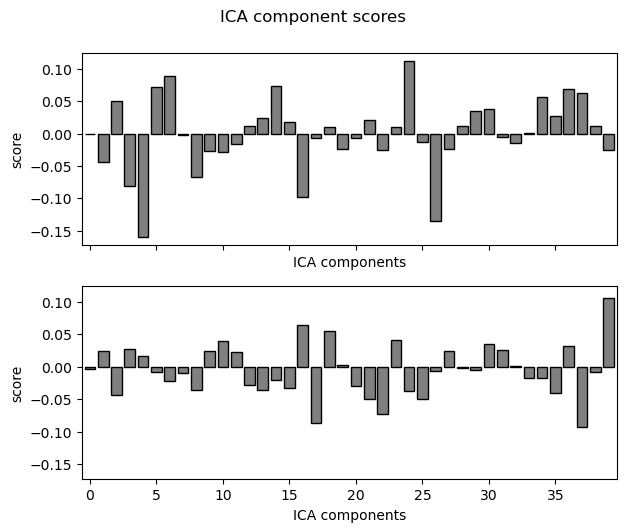

In [29]:
import time
time_start=time.time()
ica = ICA(n_components=40, random_state=97, )
#训练，但是并没有删除
ica.fit(epochs_clean_RSA)
#计时
time_end=time.time()
print('time cost',time_end-time_start,'s')
print(sub_id)
eog_inds, eog_scores = ica.find_bads_eog(epochs_clean_RSA, threshold='auto') # 用3是因为并不是真的那么准确,你需要人为判断.如果改成2,,可能会自动排除许多component.
#参考一下机器
ica.plot_scores(eog_scores)